# **AIRPLINE BOOKING PREDICTION**

#### Import the necessary libaries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go

In [134]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

**Input**:
1) num_passengers: Number of passengers associated with each booking.
2) sales_channel: How customers reached to the website.
3) trip_type: Whether booking is for one-way trip or round(two-way) trip.
4) purchase_lead: Duration between booking date and travel date.
5) length_of_stay: Duration of holiday stay.
6) flight_hour: Specifies hour of flight.
7) flight_day: Specifies day of week for flight.
8) route: Specifies flight route.
9) booking_origin: Source of booking.
10) wants_extra_baggage: Whether customer desires extra baggage allowance.
11) wants_preferred_seat: Whether customer desires preferred seats.
12) wants_in_flight_meals: Whether cusomer desires meal during the flight.
13) flight_duration: Duration of the flight.

**Output**:
booking_complete: Whether customer successfully booked the flight or not.

In [135]:
# Load data
data = pd.read_csv('D:\study\BOOKING AIRLINE/1.csv',encoding='ISO-8859-1')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### Data Processing

In [136]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [137]:
# Checking dataset
print(f'The dataset contains. {data.shape[0]} rows and {data.shape[1]} columns')

The dataset contains. 50000 rows and 14 columns


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [139]:
# Static about the dataset (Mathematically, Statistically)
data.describe().style.background_gradient(cmap='bone_r')

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.044560,9.066340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.887670,5.412660,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


**Observations:**
1) Number of Passengers ranges from 1 to 9.
-- Half of customers are willing to travel solo.
-- Most[75%] passengers are willing to travel solo or as a pair[2].
2) Purchase Lead ranges from 0 to 867.
-- Most[75%] passengers want to travel within 115 days after booking.
3) Length of Stay ranges from 0 to 778.
-- Most[75%] passengers want to travel for maximum 28 days [less than a month].
4) Flight Hour ranges from 0 to 23 [Obviously, as a day has 24 hours].
-- Most[75%] passengers are willing to travel before 1pm [13:00]
5) Wants Extra Baggage (0[No] or 1[Yes]).
-- Many customers want to get extra baggage allowance.
6) Wants Preferred Seat (0[No] or 1[Yes]).
-- Very few customers want to get preferred seats.
7) Wants In Flight Meals (0[No] or 1[Yes]).
-- Many customers do not want to get in flight meals.
8) Flight Duration ranges from 4.7 to 9.5
-- Many customers are booking flights that take less than 8.9 hours to complete.
9) Booking Complete (0[No] or 1[Yes]).
-- Most customers did not complete flight booking.

In [140]:
import statistics
# Most common attributes
for i in data.columns:
    print(i,":",statistics.mode(data[i]))

num_passengers : 1
sales_channel : Internet
trip_type : RoundTrip
purchase_lead : 1
length_of_stay : 6
flight_hour : 8
flight_day : Mon
route : AKLKUL
booking_origin : Australia
wants_extra_baggage : 1
wants_preferred_seat : 0
wants_in_flight_meals : 0
flight_duration : 8.83
booking_complete : 0


In [141]:
# Checking the null values in dataset
data.isna().sum()/len(data)*100

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

>On the basis of count the dataset does not have null values.

In [142]:
data['num_passengers'] = data['num_passengers'].astype('int8')
data['sales_channel'] = data['sales_channel'].astype('category')
data['trip_type'] = data['trip_type'].astype('category')
data['purchase_lead'] = data['purchase_lead'].astype('int16')
data['length_of_stay'] = data['length_of_stay'].astype('int16')
data['flight_hour'] = data['flight_hour'].astype('int8')
data['flight_day'] = data['flight_day'].astype('category')
data['route'] = data['route'].astype('category')
data['booking_origin'] = data['booking_origin'].astype('category')
data['wants_extra_baggage'] = data['wants_extra_baggage'].astype('int8')
data['wants_preferred_seat'] = data['wants_preferred_seat'].astype('int8')
data['wants_in_flight_meals'] = data['wants_in_flight_meals'].astype('int8')
data['flight_duration'] = data['flight_duration'].astype('float16')
data['booking_complete'] = data['booking_complete'].astype('int8')

# About Changed Dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int8    
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int16   
 4   length_of_stay         50000 non-null  int16   
 5   flight_hour            50000 non-null  int8    
 6   flight_day             50000 non-null  category
 7   route                  50000 non-null  category
 8   booking_origin         50000 non-null  category
 9   wants_extra_baggage    50000 non-null  int8    
 10  wants_preferred_seat   50000 non-null  int8    
 11  wants_in_flight_meals  50000 non-null  int8    
 12  flight_duration        50000 non-null  float16 
 13  booking_complete       50000 non-null  int8    
dtypes: category(5), float16(1), int16(2), 

In [143]:
# Checking the duplicate values in data
duplicate_values = data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 719 duplicate values


In [144]:
#drop the duplicate values in the dataset -- using pandas function
data = data.drop_duplicates()
data.shape

(49281, 14)

## About the Dataset

- Data Size: The dataset contains 49281 rows and 14 columns
- Data Types: The data contains features with data types int64, Object, Binary and
- Missing values: No column has missing values in the dataset, which is great sign and simplifies the data cleaning process.
- Unique value: The number of unique values varies among features.
- Statistical detail: The 'min', 'max', 'average' and'standard deviation' values indicate the range and dispersion of data for each column, highliting potential outliers and anomalies.
- Irrelivant feature: All the features seem important and useful for final evaluation


<Axes: title={'center': 'Understand the correlation with each column'}>

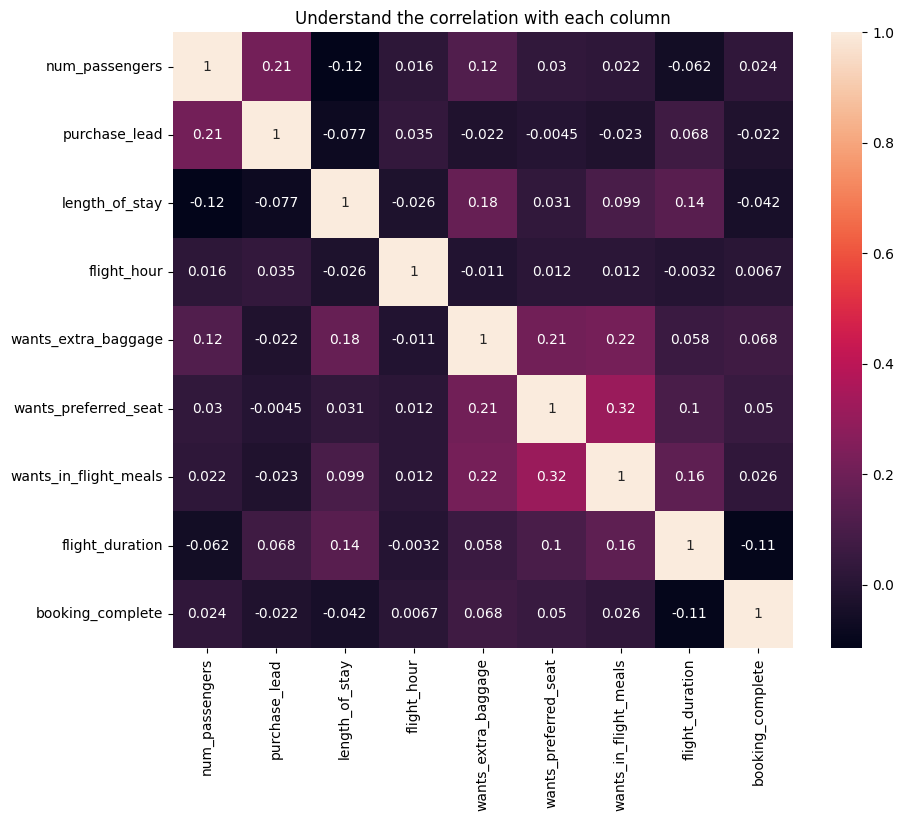

In [145]:
# Visualize the correlation map
plt.figure(figsize=(10,8))
corr = data.drop(columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']).corr()
plt.title('Understand the correlation with each column')
sns.heatmap(corr, annot=True)

## Explore the dataset

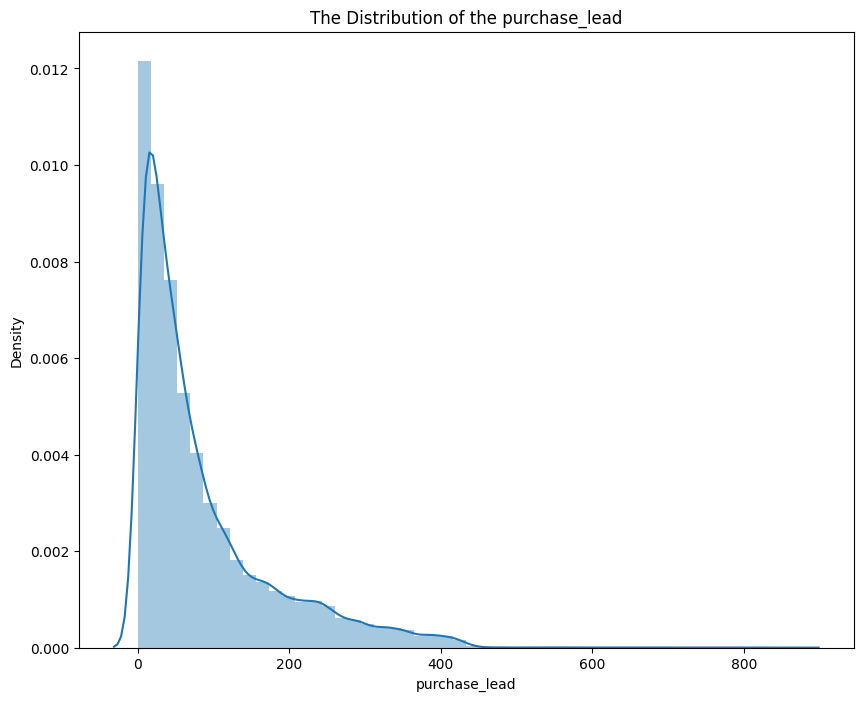

In [146]:
plt.figure(figsize=(10,8))
sns.distplot(data['purchase_lead'],hist=True,bins=50)
plt.title('The Distribution of the purchase_lead')
plt.show()

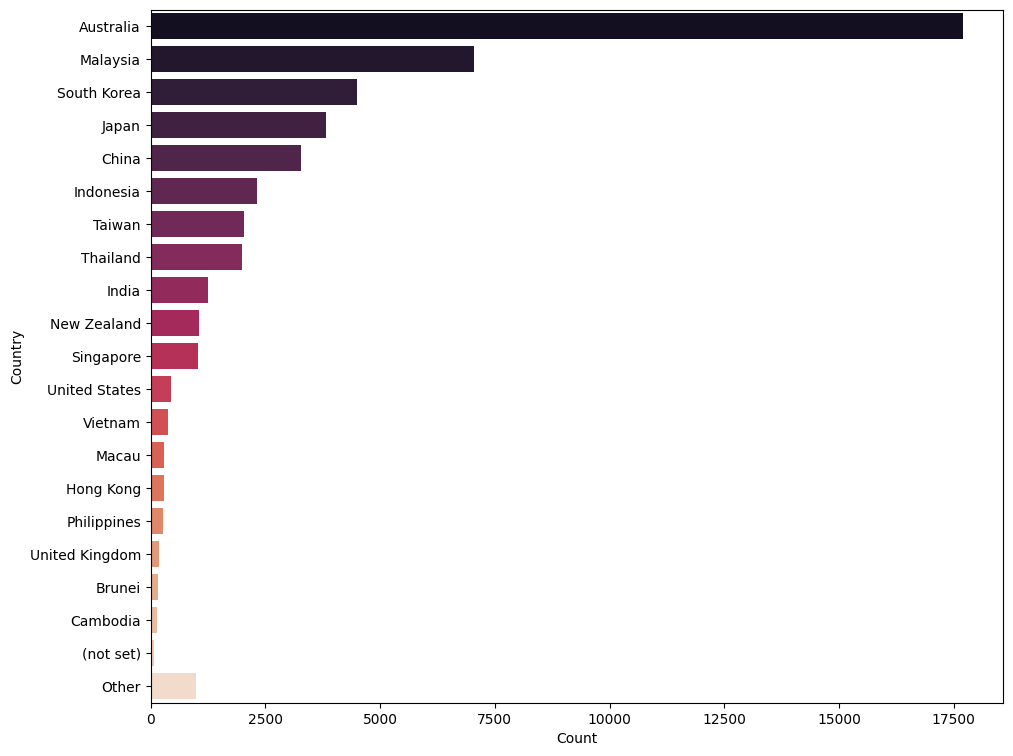

In [147]:
#Create a bar plot visualise the top 20 most demanding origin
plt.figure(figsize = (11,9))
country_counts = data.booking_origin.value_counts()
top_origin = country_counts.head(20)
other_count = country_counts.iloc[20:].sum()

temp = pd.DataFrame({
    'Country': top_origin.index,
    'Count': top_origin.values
})
other_data = pd.DataFrame({
    'Country': ['Other'],
    'Count': [other_count]
})
temp = pd.concat([temp, other_data], axis = 0)

sns.barplot(x='Count', y='Country', data=temp, palette = 'rocket')
# plt.xticks(rotation = 90)
del temp

<Axes: title={'center': 'What is the booking ratio in data'}, ylabel='Booking_complete'>

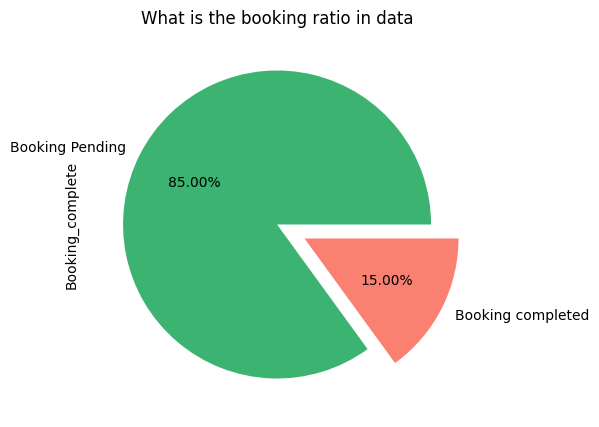

In [148]:
#Booking complete
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.ylabel('Booking complete')
plt.title('What is the booking ratio in data')
data['booking_complete'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = ['mediumseagreen','salmon'], 
                                     explode = [0, 0.2], labels=['Booking Pending',"Booking completed"],ylabel='Booking_complete')

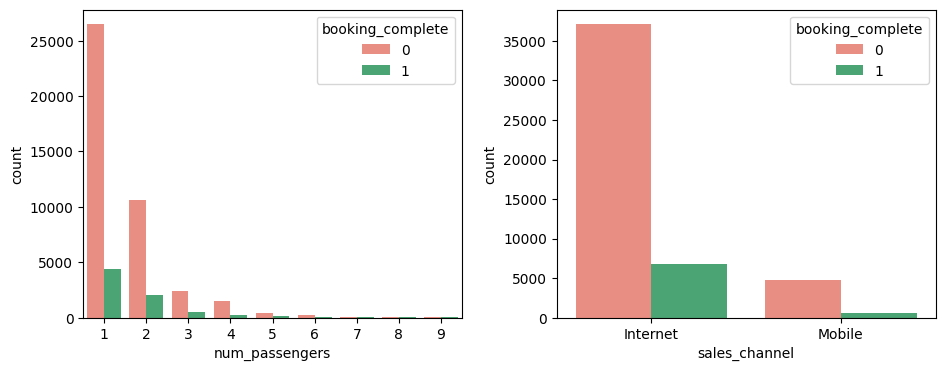

In [149]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
sns.countplot(data = data, x = 'num_passengers', hue = 'booking_complete', palette = ['salmon','mediumseagreen'])
plt.subplot(122)
sns.countplot(data = data, x = 'sales_channel', palette = ['salmon','mediumseagreen'], hue = 'booking_complete')
plt.subplots_adjust(wspace=0.25)

<Axes: title={'center': 'Find the how much percentage of booking completed through the channel'}, ylabel='booking_complete'>

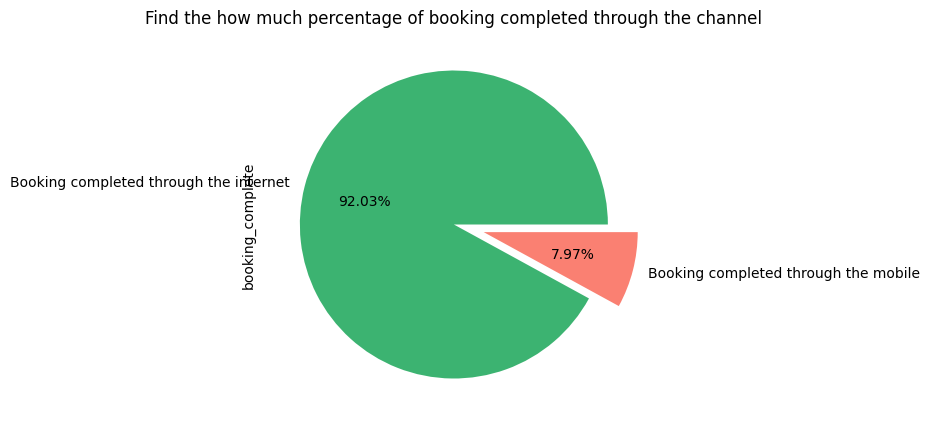

In [150]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.title('Find the how much percentage of booking completed through the channel')
data.groupby('sales_channel')['booking_complete'].sum().plot(kind='pie',autopct = '%.2f%%', colors = ['mediumseagreen','salmon'], 
                                    explode = [0, 0.2], 
                                    labels=['Booking completed through the internet',"Booking completed through the mobile"])
                            

Text(0.5, 1.0, 'How many tickets booked during the each day')

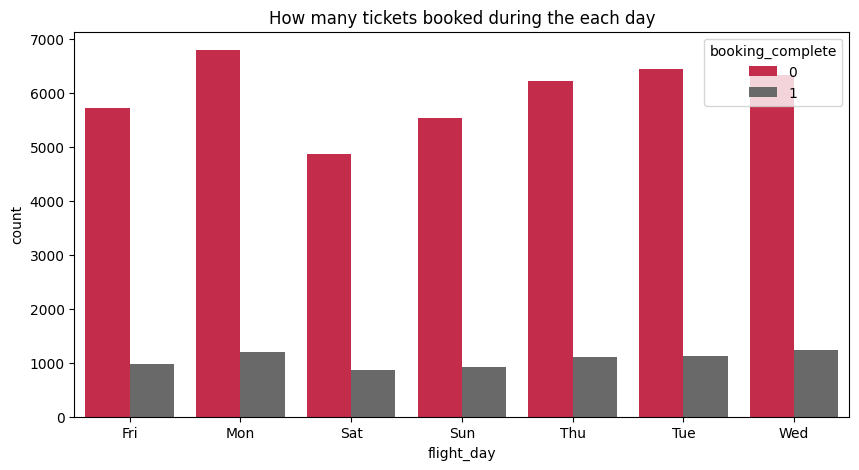

In [151]:
#Creat countplot to understand the booking status on the flight day
plt.figure(figsize = (10,5))
sns.countplot(data = data, x ='flight_day', hue = 'booking_complete', palette = ['crimson', 'dimgrey'])
plt.title('How many tickets booked during the each day')

On monday the flights are more. Tuesday and wednesday have almost same no  of flights. Saturday has the lowest no of flight counts

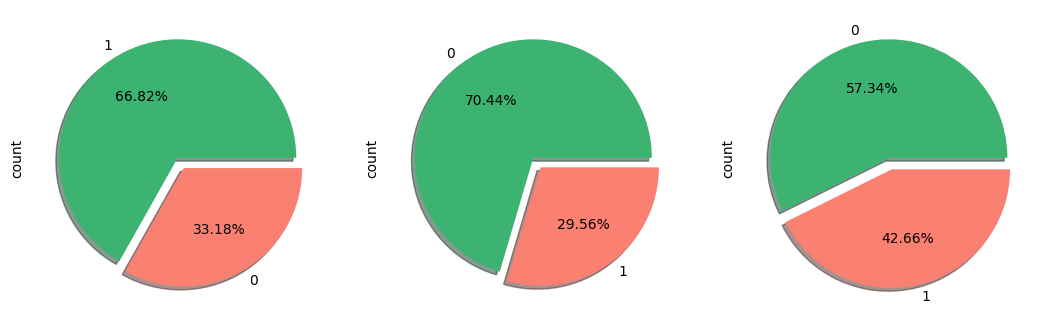

In [152]:
#Create a dataframe for the extra
df=['wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals']
plt.figure(figsize = (13,7))
for i, col in enumerate(df):
    plt.subplot(1,3,i+1)
    data[col].value_counts().plot(kind='pie',explode = [0, 0.1],
    colors = ['mediumseagreen','salmon'],
    autopct = '%1.2f%%',
    shadow=True)
    

- 66.8% people have used luggage and 33.2% have not used luggage
- 70.4% people have not used preferred seat and 29.6% people have used preferred seat.
- 57.3% people have not used flight meals and 42.7% have used flight meals

<Axes: ylabel='count'>

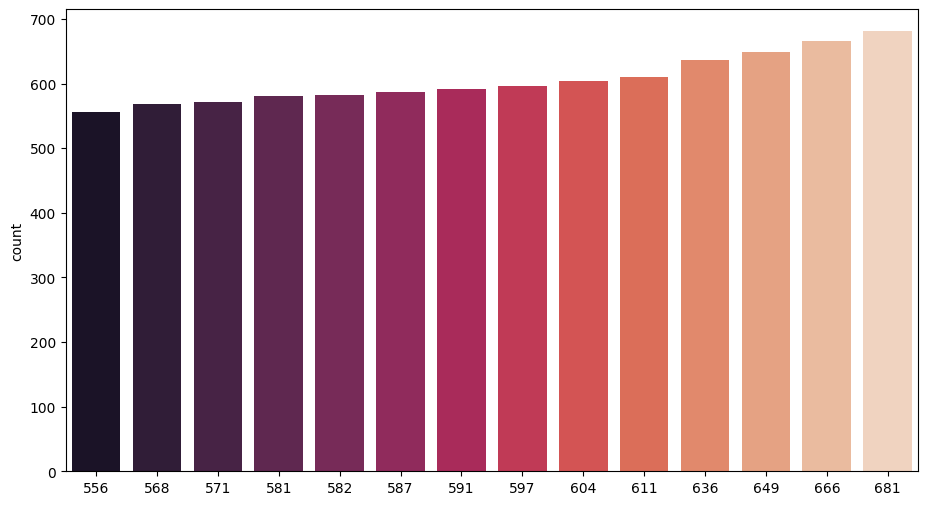

In [153]:
plt.figure(figsize = (11,6))
temp = data.purchase_lead.value_counts().head(15)
sns.barplot(data = temp, x = temp.values, y = temp.index, palette = 'rocket')


## Insights of EDA

- During the Exploratory Data Analysis (EDA) phase, we identified several interesting insights.
- The distribution plot revealed that the majority of purchase leads fall within the range of 200 to 400
- Autralia recorded the highest number of purchase leads, followed by Malaysia in second place
- Only 15% of the leads resulted in ticket bookings, indicating that 85% did not convert.
- The pie chart showed that 92% of bookings were completed through the internet, while 8% were completed via mobile devices.
- Majority of customers wants extra baggage, improving this area could result in better experience for customers.
- Features like booking_origin have high number of catgory variables, they need a proper treatment.

## MACHINE LEARNING MODELING

- Firstly, we utilized labe; encoder to convert categorical columns into numerical values, enabling us to work with these features in our machine learning models.
- Next, we devided the data into independent and dependent variables. To ensure uniformity in the data, we applied normalization techniques. 
- Subsequently, we split the data into training and testing sets, reserving 25% of the data for testing purposes, thus allowing us to evalute the model's performance on unseen data.
- We then proceeded to create a function for machine learning modeling. With this function, we could apply various classification algorithms to the datacompare their performance to determine the most suitable model for our task.

In [154]:
# Import the all required Libraries for nachine Learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [155]:
data.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.519531,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.519531,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.519531,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.519531,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.519531,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.519531,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.519531,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.519531,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.519531,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.519531,0


In [156]:
data = pd.get_dummies(data, columns = ['sales_channel','trip_type','flight_day','booking_origin'], drop_first = True)


In [157]:
data

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,AKLDEL,1,0,0,5.519531,0,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,AKLDEL,0,0,0,5.519531,0,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,AKLDEL,1,1,0,5.519531,0,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,AKLDEL,0,0,1,5.519531,0,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,AKLDEL,1,0,1,5.519531,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,PERPNH,1,0,1,5.621094,0,...,False,False,False,False,False,False,False,False,False,False
49996,1,111,6,4,PERPNH,0,0,0,5.621094,0,...,False,False,False,False,False,False,False,False,False,False
49997,1,24,6,22,PERPNH,0,0,1,5.621094,0,...,False,False,False,False,False,False,False,False,False,False
49998,1,15,6,11,PERPNH,1,0,1,5.621094,0,...,False,False,False,False,False,False,False,False,False,False


In [158]:
data.drop(['purchase_lead','route'], axis = 1, inplace = True)

In [160]:
num_cols = ['num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [161]:
data.describe()

,num_passengers,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,4.928100e+04,4.928100e+04,4.928100e+04,49281.000000,49281.000000,49281.000000,4.928100e+04,49281.000000
mean,5.201754e-08,1.764881e-08,1.269476e-08,0.668229,0.295631,0.426635,-1.610067e-08,0.149977
std,1.000010e+00,1.000010e+00,1.000010e+00,0.470854,0.456331,0.494593,1.000010e+00,0.357052
min,-5.805913e-01,-6.814291e-01,-1.675707e+00,0.000000,0.000000,0.000000,-1.743807e+00,0.000000
25%,-5.805913e-01,-5.336391e-01,-7.520124e-01,0.000000,0.000000,0.000000,-1.109027e+00,0.000000
50%,-5.805913e-01,-1.789433e-01,-1.305667e-02,1.000000,0.000000,0.000000,1.944915e-01,0.000000
75%,4.031502e-01,1.461945e-01,7.258991e-01,1.000000,1.000000,1.000000,1.035640e+00,0.000000
max,7.289340e+00,2.231468e+01,2.573288e+00,1.000000,1.000000,1.000000,1.484949e+00,1.000000


In [162]:
X = data.drop('booking_complete', axis = 1)
y = data['booking_complete']

In [163]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.2, random_state = 42)

In [164]:
from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gren = Style.BRIGHT + Fore.GREEN
blk = Style.BRIGHT + Fore.BLACK
res = Style.RESET_ALL

In [165]:
def train_classifier(model, x_train, y_train, x_val, y_val, name = "model"):
    print(f'{blk} For {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    score = accuracy_score(y_val, y_pred)
    if score<0.85:
        print(f'{red}')
    else:
        print(f'{gren}')
    print(f'{confusion_matrix(y_pred, y_val)}')
    print(f'Accuracy is {score}')
    print(f'{blk}')
    print('='*80)

In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

In [174]:
models = {
    'LogisticRegression':LogisticRegression(),
    'Balanced-RFC': BalancedRandomForestClassifier(random_state = 42),
    'RFC':RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose = False, random_state = 42),
    'Light GBM':LGBMClassifier(),
    'XGBoost':XGBClassifier(random_state = 42),
    'Hist-Gradient':HistGradientBoostingClassifier()
}

In [175]:
for i in range(len(models)):
    model = list(models.values())[i]
    name = list(models.keys())[i]
    train_classifier(model, X_train, y_train, X_val, y_val, name = name)

 For LogisticRegression

[[8366 1467]
 [  12   12]]
Accuracy is 0.8499543471644516

 For Balanced-RFC

[[5502  410]
 [2876 1069]]
Accuracy is 0.6666328497514457

 For RFC

[[8086 1309]
 [ 292  170]]
Accuracy is 0.837577356193568

 For CatBoost

[[8287 1398]
 [  91   81]]
Accuracy is 0.8489398397078218

 For Light GBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5912, number of negative: 33512
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 39424, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149959 -> initscore=-1.734919
[LightGBM] [Info] Start training from score -1.734919

[[8324 1423]
 [  54   56]]
Accuracy is 0.

## ABOUT THE PROJECT

- Some interesting insights are observed in the dataset. It appears that the majority of people, approximately 91%,  did not book their tickets, while only 9% of the people showed interest in booking. This highlights the need to enhance the quality of extra services such as luggage handling, specific seat selection, and meal options, as these factors seem to have a significant impact on customers' decisions. Additionally, we could consider incorporating online advertisements to attract more bookings.
- Furthermore, it is notable that most of the trips are round trips. To capitalize on this trend, we should focus on promoting and improving the experience for round trips while also considering offering advertising and incentives for one-way and circular trips. By understanding these patterns and preferences, we can tailor our marketing strategies to target specific trip types and attract more customers to book their tickets.